In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def sixtracklib2standardUnits(A, Eb, Vcc, frev): 
    # convert the PSD from the rms noise as applied in Sixtracklib, A, to rad^2/Hz or V^2/Hz
    # Eb in eV, Vcc in V and frev in Hz
    scaling_factor = Eb/Vcc # scaling factor to rms noise, σ
    PSD = (A*scaling_factor)**2/frev
    return PSD #not valis

In [15]:
def standardUnits2sixtracklib(PSD, Eb, Vcc, frev): 
    # convert the PSD from rad^2/Hz or V^2/Hz to the rms noise as applied in Sixtracklib, A
    # Eb in eV, Vcc in V and frev in Hz
    scaling_factor = Vcc/Eb # scaling factor to rms noise, σ
    A = np.sqrt(PSD*frev)*scaling_factor
    return A

In [22]:
def create_noise_kicks(mu, A, turns):
    # create sequence of noise kicks, as they applied in the simulations
    # A the rms amplitude, mu the mean of the normal distribution and turns the number of simulated turns
    return np.random.normal(mu, A, turns)

In [23]:
def SSB_to_PSD(L): 
    # convert the SSB measurement, L(f) in dBc/Hz, to S(f) in rad^2/Hz
    return 2*10**(L/10)

In [46]:
standardUnits2sixtracklib(2e-21, 270e9, 1e6, 43.45e3)

3.4525988700507905e-14

In [47]:
sixtracklib2standardUnits(1e-8, 270e9, 1e6, 43.45e3)

1.6777905638665135e-10

2.3205943161688158e-12
3.0051441352280505e-09


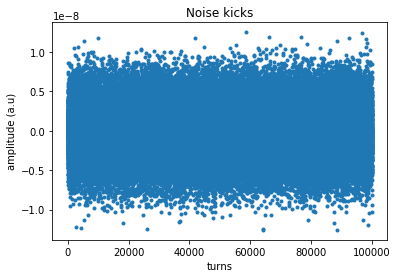

In [48]:
kicks = create_noise_kicks(0, 3e-9, int(1e5))
plt.plot(kicks, '.')
plt.xlabel('turns')
plt.ylabel('amplitude (a.u)')
plt.title('Noise kicks')
print(np.mean(kicks))
print(np.std(kicks))

In [41]:
1e-8*270e9/1e6

0.0027